# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
output_data_file = "../output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?id=524901&units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
        # Parse the JSON and retrieve data
        
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | avera
Processing Record 3 of Set 1 | la rioja
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 1 | manta
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | mangan
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | thunder bay
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | male
Processing Record 20 of Set 1 | ushuaia
Processi

Processing Record 36 of Set 4 | umm kaddadah
Processing Record 37 of Set 4 | caetite
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | boli
Processing Record 40 of Set 4 | dicabisagan
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | montorio al vomano
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | kauhajoki
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | vaghodia
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | mikhaylovka
Processing Record 49 of Set 4 | mokrous
Processing Record 0 of Set 5 | kristiinankaupunki
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | nyaunglebin
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | rafsanjan
Processing Record 7 of Set 5 | karakendzha
City not found. Skipping...


Processing Record 22 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 23 of Set 8 | manavalakurichi
Processing Record 24 of Set 8 | mandalgovi
Processing Record 25 of Set 8 | ishigaki
Processing Record 26 of Set 8 | kysyl-syr
Processing Record 27 of Set 8 | iguaba grande
Processing Record 28 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 29 of Set 8 | kahului
Processing Record 30 of Set 8 | pindobacu
Processing Record 31 of Set 8 | erenhot
Processing Record 32 of Set 8 | clarence town
Processing Record 33 of Set 8 | vila velha
Processing Record 34 of Set 8 | monte aprazivel
Processing Record 35 of Set 8 | saint john
Processing Record 36 of Set 8 | sao felix do xingu
Processing Record 37 of Set 8 | nome
Processing Record 38 of Set 8 | salalah
Processing Record 39 of Set 8 | mzimba
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | ekhabi
Processing Record 42 of Set 8 | bengkulu
Processing Record 43 of Set 8 | aizawl
Processin

City not found. Skipping...
Processing Record 14 of Set 12 | hobyo
Processing Record 15 of Set 12 | zhezkazgan
Processing Record 16 of Set 12 | aragarcas
Processing Record 17 of Set 12 | amberg
Processing Record 18 of Set 12 | pasighat
Processing Record 19 of Set 12 | awjilah
Processing Record 20 of Set 12 | kargasok
Processing Record 21 of Set 12 | baker
Processing Record 22 of Set 12 | abay
Processing Record 23 of Set 12 | west fargo
Processing Record 24 of Set 12 | jadu
Processing Record 25 of Set 12 | bara
Processing Record 26 of Set 12 | baoqing
Processing Record 27 of Set 12 | hindaun
Processing Record 28 of Set 12 | labrea
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

531

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,66.27,76,96,19.19,NA,1675624461
1,avera,33.1940,-82.5271,64.38,61,100,5.01,US,1675624462
2,la rioja,42.2500,-2.5000,37.18,91,44,5.73,ES,1675624462
3,ancud,-41.8697,-73.8203,64.58,73,23,11.34,CL,1675624463
4,manta,-0.9500,-80.7333,83.98,74,75,6.91,EC,1675624464


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,66.27,76,96,19.19,NaN,1675624461
1,avera,33.1940,-82.5271,64.38,61,100,5.01,US,1675624462
2,la rioja,42.2500,-2.5000,37.18,91,44,5.73,ES,1675624462
3,ancud,-41.8697,-73.8203,64.58,73,23,11.34,CL,1675624463
4,manta,-0.9500,-80.7333,83.98,74,75,6.91,EC,1675624464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

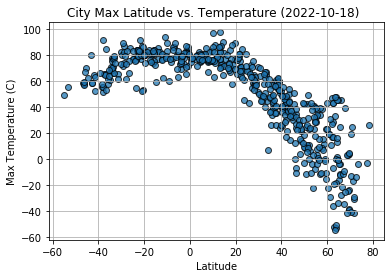

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", 
           alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)  ")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

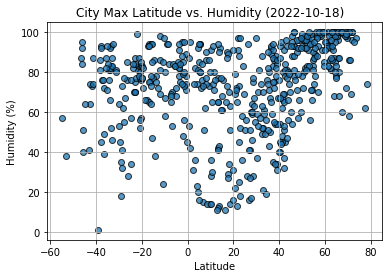

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (2022-10-18)  ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

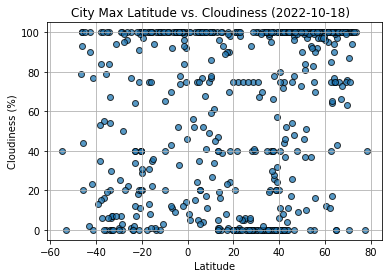

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)  ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

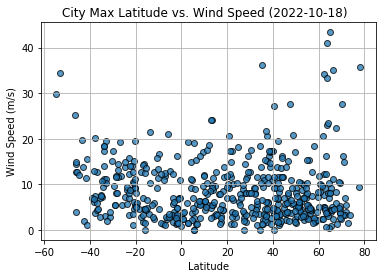

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)  ")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avera,33.1940,-82.5271,64.38,61,100,5.01,US,1675624462
2,la rioja,42.2500,-2.5000,37.18,91,44,5.73,ES,1675624462
5,klyuchi,52.2667,79.1667,10.56,97,100,4.56,RU,1675624189
6,port blair,11.6667,92.7500,78.91,80,61,5.35,IN,1675624467
7,mangan,27.5167,88.5333,58.32,60,93,2.71,IN,1675624468


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,66.27,76,96,19.19,NaN,1675624461
3,ancud,-41.8697,-73.8203,64.58,73,23,11.34,CL,1675624463
4,manta,-0.9500,-80.7333,83.98,74,75,6.91,EC,1675624464
8,hobart,-42.8794,147.3294,58.86,74,90,13.80,AU,1675624387
11,new norfolk,-42.7826,147.0587,58.50,64,100,1.99,AU,1675624471


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.7397661172869262


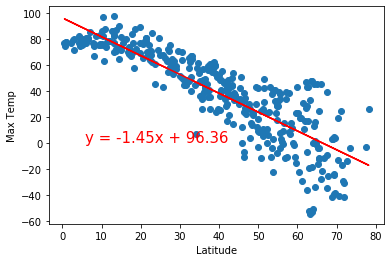

In [23]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [24]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.2765093213074824


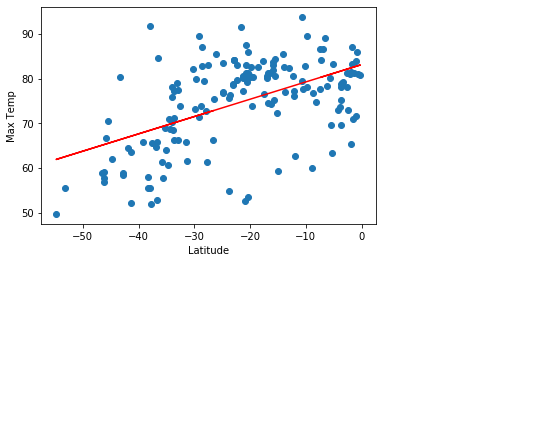

In [25]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
With the northern hemisphere, the temperature ranges from -60 to 80. Indicating that as you move away from the latitude, the max temperature gets colder. Thus creating a perfect negative correction. With the southern hemisphere, there is indication of low correlation.  

### Humidity vs. Latitude Linear Regression Plot

In [26]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.25437642724778364


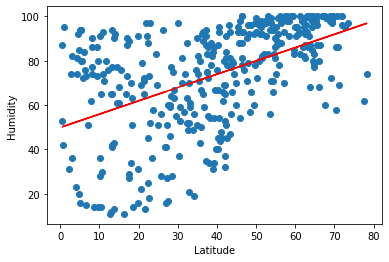

In [27]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [28]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.03584812810520901


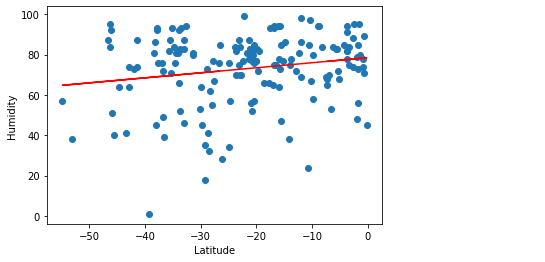

In [29]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the northern hemisphere, as the latitude increases, humidity increases. Creating a positive correlation. For the southern hemisphere, there is no significant correlation between latitudes and humidity but as the latitude gets closer to 0, a cluster starts to form. 

### Cloudiness vs. Latitude Linear Regression Plot

In [30]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.10054196319492083


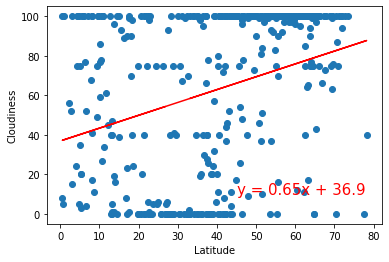

In [31]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [32]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0711877158756169


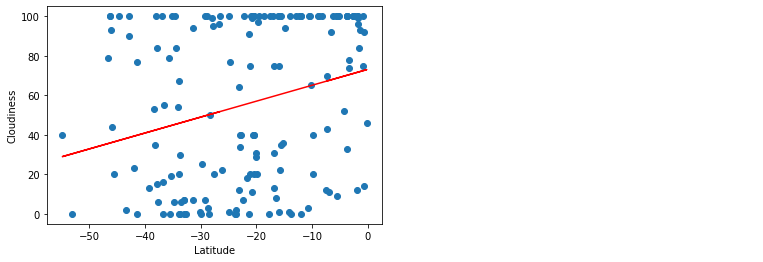

In [33]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the northern hemisphere, there is a cluster between the latitudes of 10 - 40 when the cloudiness is 0 and 20 and a latitude of 40 - 80 when the cloudiness is 95 - 100. Making those points the strongest. A for the south, as the cloudiness and latitude increase, there seems to be a cluster. 

### Wind Speed vs. Latitude Linear Regression Plot

In [34]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0034224590513567132


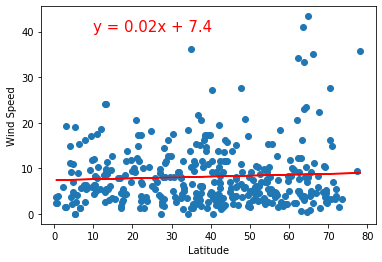

In [35]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [36]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.15196624609984877


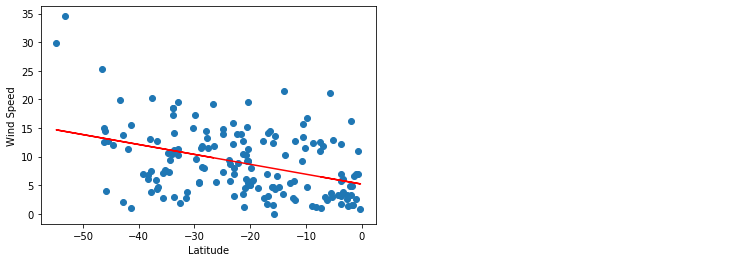

In [37]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the north, it tends to be evenly distributed with some outliners that are passed the cluster. With the south, as we move away from the latitude, so does the wind speed. 